In [1]:
# Trying to experiment with reading pickle files
import pickle
import os
import numpy as np

# Loading data and store it to variables

In [2]:
# Root dir to the project, adjust this your own project path
rootdir = 'C:/Users/User/Downloads/angewandte-ki-cog-village/data/training/'

# data event variable is sensor dict data
# data label event variable is based on the file name, extracted with string split
data             = []
data_label       = []
data_label_text  = []


for subdir, dirs, files in os.walk(rootdir):
    for fl in files:
        if fl.endswith('.pkl'):
            # string split for event labelling
            str_arr = fl.split('_')
            label   = str_arr[1]

            # read data and append it to variable
            infile = open((rootdir + fl),'rb')
            new_dict = pickle.load(infile, encoding='latin1')

            data.append(new_dict)
            data_label.append(new_dict['label'])
            data_label_text.append(label)

# Reading data

In [3]:
# Read data data[index] example
# print(data[500])

# Get keys list
# print(data[500].keys())

# Get key value inside dict object
# print(data[500]['subject'])
# print(data[500]['Magnetometer'])
# print(data[500]['label'])

# Get shape
# print(data[500]['Magnetometer'].shape)

# Get label
# print(data_label)

# Data structure

In [4]:
selected_data = data[0]
keys = data[0].keys()

for key in keys:
    print(key,':',type(selected_data[key]))
    if type(selected_data[key]) is np.ndarray:
        print(selected_data[key].shape)
    else:
        print(selected_data[key])


Magnetometer : <class 'numpy.ndarray'>
(245, 3)
JinsBlinkSpeed : <class 'numpy.ndarray'>
(101, 1)
rightHand : <class 'bool'>
False
Accelerometer : <class 'numpy.ndarray'>
(982, 3)
MSGyroscope : <class 'numpy.ndarray'>
(307, 3)
MSAccelerometer : <class 'numpy.ndarray'>
(307, 3)
JinsGyroscope : <class 'numpy.ndarray'>
(101, 3)
Gravity : <class 'numpy.ndarray'>
(1001, 3)
label : <class 'int'>
0
LinearAccelerometer : <class 'numpy.ndarray'>
(994, 3)
executionId : <class 'int'>
0
session : <class 'int'>
1
JinsAccelerometer : <class 'numpy.ndarray'>
(101, 3)
JinsBlinkStrength : <class 'numpy.ndarray'>
(101, 1)
JinsEyeMovement : <class 'numpy.ndarray'>
(101, 4)
Gyroscope : <class 'numpy.ndarray'>
(984, 3)
subject : <class 'int'>
1


# Plotting testing

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Magnetometer

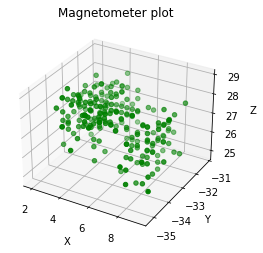

In [6]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

magnetometer = data[0]['Magnetometer']

x_vals = magnetometer[:, 0]
y_vals = magnetometer[:, 1]
z_vals = magnetometer[:, 2]

ax.scatter(x_vals, y_vals, z_vals, c='g')

ax.set_title('Magnetometer plot')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Accelerometer with comparing activity example

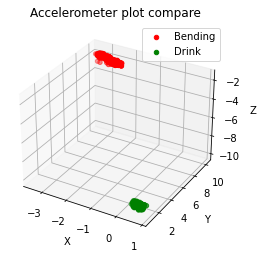

In [7]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data index 0 is bending, label = 0
accelerometerOne = data[0]['Accelerometer']

x_vals_one = accelerometerOne[:, 0]
y_vals_one = accelerometerOne[:, 1]
z_vals_one = accelerometerOne[:, 2]

# Data index 100 is drink, label = 16
accelerometerTwo = data[100]['Accelerometer']

x_vals_two = accelerometerTwo[:, 0]
y_vals_two = accelerometerTwo[:, 1]
z_vals_two = accelerometerTwo[:, 2]

ax.scatter(x_vals_one, y_vals_one, z_vals_one, c='r', label = 'Bending')
ax.scatter(x_vals_two, y_vals_two, z_vals_two, c='g', label = 'Drink')

ax.set_title('Accelerometer plot compare')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

plt.show()

## Trying to plot plotable data of an activity e.g. Bending

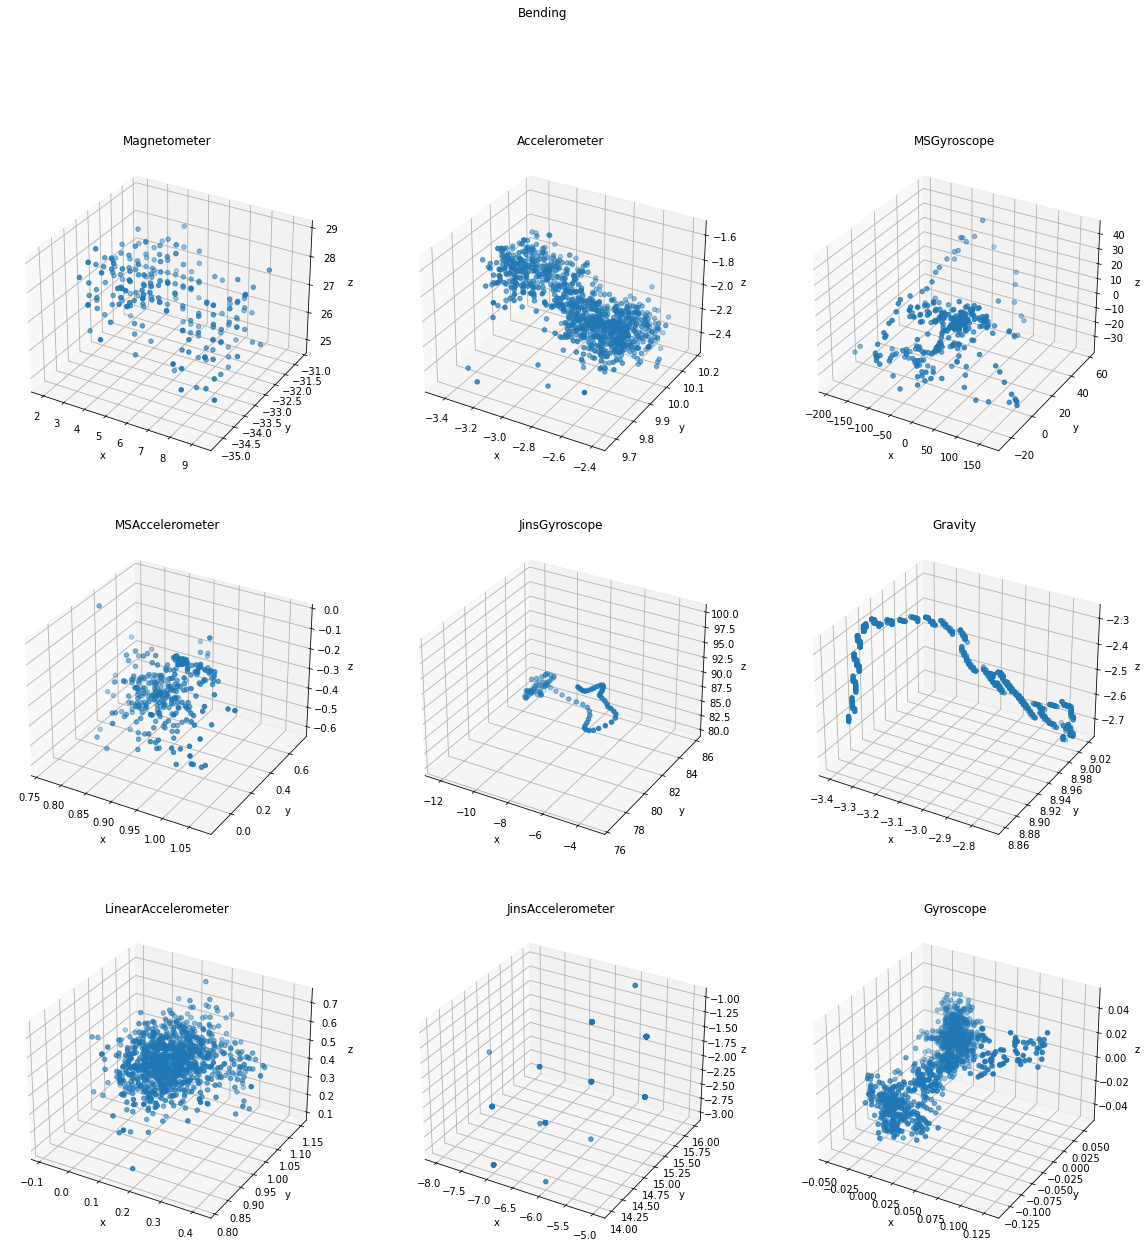

In [8]:
# TODO find out how to plot (n, 4) JinsEyeMovement sensor data - maybe through reshape?
# TODO find out how to plot (n, 1) JinsBlinkStrength sensor data 

selected_data = data[0]
keys = data[0].keys()

# Prepare the plot
fig = plt.figure(figsize=(20,20))
fig.suptitle('Bending')
ax  = dict()

index = 1

for key in keys:
    if type(selected_data[key]) is np.ndarray:
        # If data is 3d array type
        if selected_data[key].shape[1] == 3:

            x_vals = selected_data[key][:,0]
            y_vals = selected_data[key][:,1]
            z_vals = selected_data[key][:,2]

            ax[index] = fig.add_subplot(3, 3, index, projection='3d')

            ax[index].set_title(key)
            ax[index].set_xlabel('x')
            ax[index].set_ylabel('y')
            ax[index].set_zlabel('z')

            ax[index].scatter(x_vals, y_vals, z_vals)

            index = index + 1



# Test concatenate data per activity

In [5]:
# Root dir to the project, adjust this your own project path
rootdir = 'C:/Users/User/Downloads/angewandte-ki-cog-village/data/training/'

# data event variable is sensor dict data
# data label event variable is based on the file name, extracted with string split
data             = []
data_label       = []
data_label_text  = []


for subdir, dirs, files in os.walk(rootdir):
    for fl in files:
        if fl.endswith('.pkl'):
            # string split for event labelling
            str_arr = fl.split('_')
            label   = str_arr[1]

            # read data and append it to variable
            infile = open((rootdir + fl),'rb')
            new_dict = pickle.load(infile, encoding='latin1')

            data.append(new_dict)
            data_label.append(new_dict['label'])
            data_label_text.append(label)

In [181]:
from collections import defaultdict

keys = list(data[0].keys())

# Remove duplicates
unique_data_label = list(set(data_label))

activity_multi_array = []
activity_multi_label = unique_data_label

for label in unique_data_label:
    data_total = defaultdict(list)
    
    for dt in data:
        # Due to some data don't have all keys
        keys = list(dt.keys())
        if dt['label'] == label:
            for k in keys:
                data_total[k].append(dt[k])
                
    for k in keys:
        data_total[k] = np.vstack(data_total[k])
    
    activity_multi_array.append(data_total)
    